In [74]:
import pandas as pd
pd.set_option("display.max_columns", None)

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../../data//processed_data/cleaned_integrated.csv")
df

,zipcode,po_name,population,area,state_fips,county_fips,geometry,lights_number,area_mile,light_density_mile,business_landuse,public_landuse,residential_landuse,total_landuse_area,business_ratio,public_ratio,residential_ratio,sidewalk_length,sidewalk_area,street_fair_ft,street_good_ft,street_nr_ft,street_poor_ft,street_length_ft,street_fair_ratio,street_good_ratio,street_nr_ratio,street_poor_ratio,arrest_count,jan_arrests,feb_arrests,mar_arrests,apr_arrests,may_arrests,jun_arrests,jul_arrests,aug_arrests,sep_arrests,oct_arrests,nov_arrests,dec_arrests,pop_dens_mile,sidewalk_area_mile,sidewalk_density
0,11213.0,Brooklyn,62426.0,2.963100e+07,36.0,47.0,POLYGON ((1001613.7129640579 186926.4395172149...,646.0,1.062866,607.790615,5327324.0,3480718.0,25284240.0,34092282.0,0.156262,0.102097,0.741641,5.179411e+05,3.404947e+06,20450.328412,74077.364992,0.000000,171.353421,94699.046825,0.215951,0.782240,0.000000,0.001809,2568.0,205.0,197.0,204.0,229.0,236.0,220.0,203.0,199.0,223.0,258.0,201.0,193.0,58733.648459,0.122136,0.114912
1,11212.0,Brooklyn,83866.0,4.197210e+07,36.0,47.0,"POLYGON ((1011174.275535807 183696.33770971, 1...",728.0,1.505542,483.546766,9686094.0,5368412.0,28256031.0,43310537.0,0.223643,0.123952,0.652405,8.043603e+05,5.094083e+06,42740.061035,135857.883777,2063.149670,748.383281,181409.477763,0.235600,0.748902,0.011373,0.004125,2961.0,287.0,241.0,275.0,228.0,290.0,227.0,293.0,293.0,196.0,238.0,202.0,191.0,55704.853166,0.182725,0.121368
2,11225.0,Brooklyn,56527.0,2.369863e+07,36.0,47.0,POLYGON ((995908.3654508889 183617.61280155182...,490.0,0.850071,576.422178,7868115.0,2554369.0,21182554.0,31605038.0,0.248951,0.080822,0.670227,4.010251e+05,2.462233e+06,27581.352686,58257.349875,0.000000,434.510199,86273.212760,0.319698,0.675266,0.000000,0.005036,1427.0,111.0,101.0,114.0,114.0,123.0,130.0,108.0,156.0,136.0,128.0,113.0,93.0,66496.768308,0.088320,0.103898
3,11218.0,Brooklyn,72280.0,3.686880e+07,36.0,47.0,"POLYGON ((991997.1134308875 176307.4958601296,...",628.0,1.322486,474.863182,6922363.0,2841905.0,26345333.0,36109601.0,0.191704,0.078702,0.729594,6.747928e+05,3.857986e+06,26161.827616,132294.639490,4667.815745,121.202211,163245.485063,0.160261,0.810403,0.028594,0.000742,368.0,48.0,25.0,37.0,34.0,30.0,31.0,35.0,21.0,35.0,26.0,23.0,23.0,54654.634995,0.138386,0.104641
4,11226.0,Brooklyn,106132.0,3.940860e+07,36.0,47.0,"POLYGON ((994821.4729396403 177865.7178093046,...",521.0,1.413589,368.565415,9801414.0,2790225.0,36865969.0,49457608.0,0.198178,0.056416,0.745405,6.927058e+05,3.945623e+06,40136.353728,124379.965244,478.122393,302.803669,165297.245033,0.242813,0.752462,0.002893,0.001832,2973.0,238.0,234.0,273.0,250.0,228.0,236.0,232.0,251.0,246.0,258.0,262.0,265.0,75079.817068,0.141530,0.100121
5,11219.0,Brooklyn,92561.0,4.200274e+07,36.0,47.0,"POLYGON ((987286.3515269756 173946.4621963799,...",913.0,1.506641,605.983803,10198773.0,5623325.0,27342958.0,43165056.0,0.236274,0.130275,0.633451,7.987518e+05,4.429807e+06,37754.971483,153997.632019,0.000000,283.992572,192036.596074,0.196603,0.801918,0.000000,0.001479,710.0,77.0,45.0,57.0,56.0,49.0,59.0,46.0,59.0,66.0,63.0,67.0,66.0,61435.341506,0.158897,0.105465
6,11210.0,Brooklyn,67067.0,4.788702e+07,36.0,47.0,POLYGON ((995796.0097044706 171110.06662246585...,437.0,1.717711,254.408398,5051282.0,4512554.0,26227650.0,35791486.0,0.141131,0.126079,0.732790,8.678153e+05,4.457077e+06,36943.643355,157097.373184,117.098340,275.878699,194433.993578,0.190006,0.807973,0.000602,0.001419,1511.0,116.0,105.0,114.0,114.0,102.0,149.0,132.0,133.0,131.0,144.0,157.0,114.0,39044.411948,0.159876,0.093075
7,11230.0,Brooklyn,80857.0,4.992670e+07,36.0,47.0,POLYGON ((994099.2959063053 171240.70645305514...,524.0,1.790874,292.594556,7074178.0,3202709.0,33920160.0,44197047.0,0.160060,0.072464,0.767476,8.868350e+05,4.866473e+06,32257.308999,167109.767727,0.000000,210.012134,199577.088860,0.161628,0.837319,0.000000,0.001052,1287.0,100.0,76.0,135.0,100.0,88.0,91.0,110.0,116.0,90.0,139.0,107.0,135.0,45149.461822,0.

In [7]:
df.columns

Index(['zipcode', 'po_name', 'population', 'area', 'state_fips', 'county_fips',
       'geometry', 'lights_number', 'area_mile', 'light_density_mile',
       'business_landuse', 'public_landuse', 'residential_landuse',
       'total_landuse_area', 'business_ratio', 'public_ratio',
       'residential_ratio', 'sidewalk_length', 'sidewalk_area',
       'street_fair_ft', 'street_good_ft', 'street_nr_ft', 'street_poor_ft',
       'street_length_ft', 'street_fair_ratio', 'street_good_ratio',
       'street_nr_ratio', 'street_poor_ratio', 'arrest_count', 'jan_arrests',
       'feb_arrests', 'mar_arrests', 'apr_arrests', 'may_arrests',
       'jun_arrests', 'jul_arrests', 'aug_arrests', 'sep_arrests',
       'oct_arrests', 'nov_arrests', 'dec_arrests', 'pop_dens_mile',
       'sidewalk_area_mile', 'sidewalk_density'],
      dtype='object')

# Bayesian Network Tryout

In [16]:
data = df[['population', 'lights_number', 'light_density_mile', 'business_ratio', 'public_ratio',
           'residential_ratio', 'sidewalk_length', 'street_fair_ft', 'street_good_ft',
           'street_nr_ft', 'street_poor_ft', 'street_length_ft', 'street_fair_ratio', 'street_good_ratio',
           'street_nr_ratio', 'street_poor_ratio', 'arrest_count', 'pop_dens_mile', 'sidewalk_area_mile', 'sidewalk_density']]


# Reduce the number of variables or discretize them
# Example: Discretize 'population' into 'low', 'medium', 'high'
data['population_category'] = pd.cut(data['population'], bins=3, labels=["low", "medium", "high"])

# Revised model with fewer edges or simplified relationships
model = BayesianNetwork([
    ('pop_dens_mile', 'light_density_mile'),
    ('pop_dens_mile', 'sidewalk_area_mile'),
    ('population_category', 'sidewalk_density')  # Using the discretized population
])

# Learn the parameters with possibly a different estimator or method
model.fit(data, estimator=MaximumLikelihoodEstimator)

C:\Users\hongy\AppData\Local\Temp\ipykernel_28328\3653060810.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['population_category'] = pd.cut(data['population'], bins=3, labels=["low", "medium", "high"])


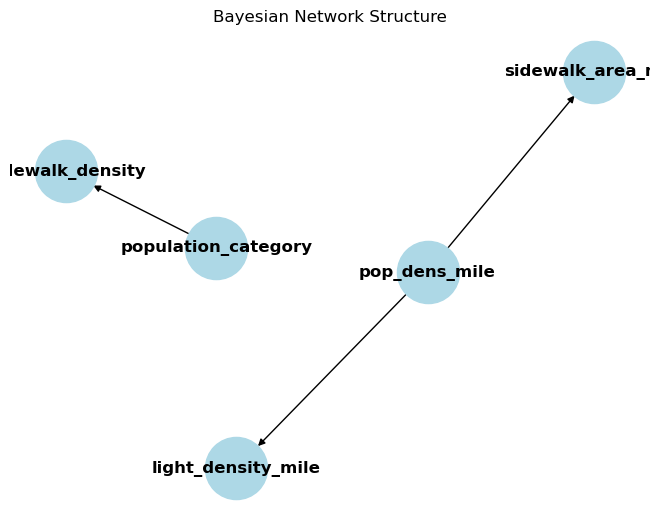

In [19]:
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Visualize the network using NetworkX
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight='bold', pos=nx.spring_layout(G))
plt.title('Bayesian Network Structure')
plt.show()

In [ ]:
# Define the structure

model = BayesianNetwork([
    ('pop_dens_mile', 'light_density_mile'),
    ('pop_dens_mile', 'sidewalk_area_mile'),
    ('pop_dens_mile', 'arrest_count'),
    ('pop_dens_mile', 'sidewalk_density'),
    ('light_density_mile', 'street_fair_ratio'),
    ('business_ratio', 'sidewalk_length'),
    ('business_ratio', 'sidewalk_area_mile'),
    ('residential_ratio', 'sidewalk_length'),
    ('residential_ratio', 'sidewalk_area_mile'),
    ('street_length_ft', 'street_fair_ratio'),
    ('street_length_ft', 'street_good_ratio'),
    ('street_length_ft', 'street_nr_ratio'),
    ('street_length_ft', 'street_poor_ratio'),
    ('population', 'sidewalk_density'),
    ('sidewalk_length', 'sidewalk_area_mile'),
    ('public_ratio', 'sidewalk_area_mile')
])

# Learn the parameters
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Visualize the network
nx.draw(model, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight='bold')
plt.title('Bayesian Network Structure')
plt.show()

In [24]:
data.sidewalk_density

0     0.114912
1     0.121368
2     0.103898
3     0.104641
4     0.100121
5     0.105465
6     0.093075
7     0.097472
8     0.092550
9     0.092880
10    0.100503
11    0.128354
12    0.029126
13    0.113696
14    0.117855
15    0.085339
16    0.101518
17    0.117769
18    0.118897
19    0.097129
20    0.097129
21    0.091175
22    0.054948
23    0.087754
24    0.032100
25    0.076682
26    0.090544
27    0.042434
28    0.080017
29    0.079319
30    0.086164
31    0.082400
32    0.091116
33    0.074351
34    0.076121
35    0.120071
36    0.113095
37    0.129025
38    0.102885
39    0.100687
Name: sidewalk_density, dtype: float64

In [28]:
# Performing inference
infer = VariableElimination(model)
# Example query
query_result = infer.query(variables=['sidewalk_density'], evidence={'population_category':'low'})
print(query_result)

+--------------------------------------+-------------------------+
| sidewalk_density                     |   phi(sidewalk_density) |
+======================================+=========================+
| sidewalk_density(0.029125552159979)  |                  0.1667 |
+--------------------------------------+-------------------------+
| sidewalk_density(0.0321003494871983) |                  0.1667 |
+--------------------------------------+-------------------------+
| sidewalk_density(0.0424335240408752) |                  0.0000 |
+--------------------------------------+-------------------------+
| sidewalk_density(0.0549481053422063) |                  0.1667 |
+--------------------------------------+-------------------------+
| sidewalk_density(0.0743505828679444) |                  0.0000 |
+--------------------------------------+-------------------------+
| sidewalk_density(0.0761212156774986) |                  0.0000 |
+--------------------------------------+----------------------

# ignore

In [28]:
# Structure learning
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method='BicScore')
print("Best model structure:", best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Best model structure: []


In [ ]:
# Create a Bayesian Model
model = BayesianModel(best_model.edges())

# Learning the parameters using the Maximum Likelihood Estimator
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [ ]:
G = nx.DiGraph()
G.add_edges_from(best_model.edges())
pos = nx.spring_layout(G, k=30, seed=20) # k: optimal distance between nodes

highlightedNodes = {'PUMA_1'}

node_colors = ['red' if node in highlightedNodes else 'lightgrey' for node in G.nodes()]

plt.figure(figsize=(12, 10))
nx.draw_networkx_edges(G, pos=pos, arrowstyle='-|>', arrowsize=20, edge_color='k')
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors, node_size=800, alpha=0.5)
nx.draw_networkx_labels(G, pos=pos, font_size=10)

plt.title('Bayesian Network using pgmpy')
plt.savefig('pgmpy_3person.png')
plt.show()

In [ ]:

# Doing inference
infer = VariableElimination(model)
query = infer.query(variables=['bike_score'], evidence={'walk_score': 80})
print(query)

# CORRELATION

In [36]:
df.columns

Index(['zipcode', 'po_name', 'population', 'area', 'state_fips', 'county_fips',
       'geometry', 'lights_number', 'area_mile', 'light_density_mile',
       'business_landuse', 'public_landuse', 'residential_landuse',
       'total_landuse_area', 'business_ratio', 'public_ratio',
       'residential_ratio', 'sidewalk_length', 'sidewalk_area',
       'street_fair_ft', 'street_good_ft', 'street_nr_ft', 'street_poor_ft',
       'street_length_ft', 'street_fair_ratio', 'street_good_ratio',
       'street_nr_ratio', 'street_poor_ratio', 'arrest_count', 'jan_arrests',
       'feb_arrests', 'mar_arrests', 'apr_arrests', 'may_arrests',
       'jun_arrests', 'jul_arrests', 'aug_arrests', 'sep_arrests',
       'oct_arrests', 'nov_arrests', 'dec_arrests', 'pop_dens_mile',
       'sidewalk_area_mile', 'sidewalk_density'],
      dtype='object')

In [100]:
corr_df = df[['light_density_mile','arrest_count', 'pop_dens_mile', 'sidewalk_density',
       'business_ratio', 'public_ratio', 'residential_ratio',
       'street_fair_ratio', 'street_good_ratio', 'street_nr_ratio', 'street_poor_ratio']]

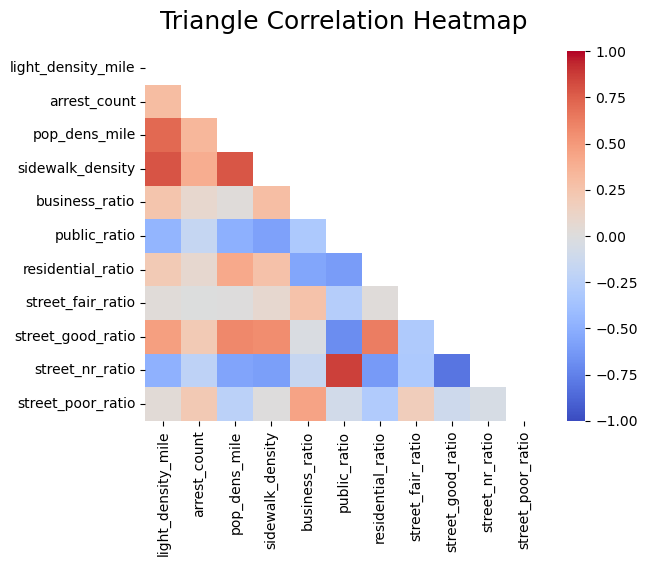

In [101]:
plt.figure()
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
heatmap = sns.heatmap(corr_df.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('../../results/triangle_correlation_heatmap.png', dpi=300, bbox_inches='tight')

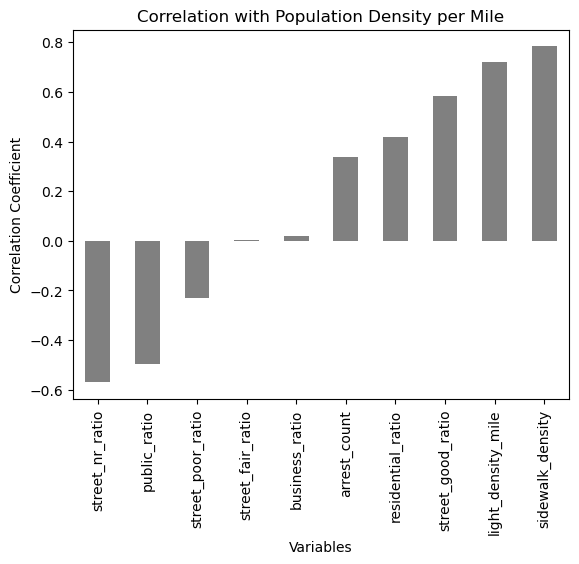

In [113]:
correlations = corr_df.corr()['pop_dens_mile'].drop('pop_dens_mile')
correlations.sort_values(inplace=True)
correlations.plot(kind='bar', color='grey')
plt.title('Correlation with Population Density per Mile')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

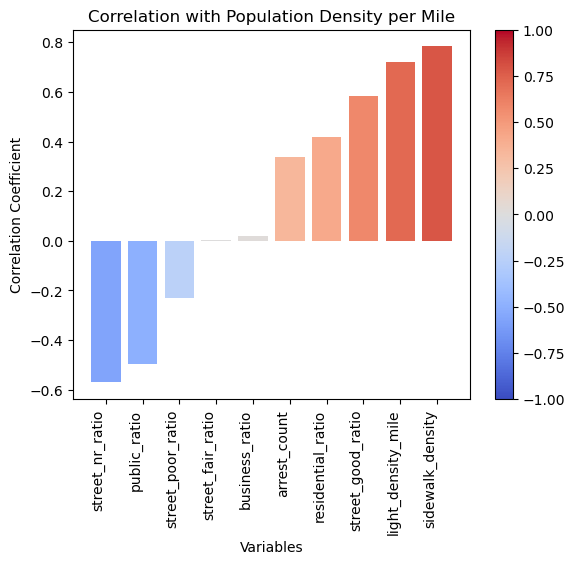

In [120]:
correlations = corr_df.corr()['pop_dens_mile'].drop('pop_dens_mile')
correlations.sort_values(inplace=True)

cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=-1, vmax=1)

colors = cmap(norm(correlations.values))

plt.figure()
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Population Density per Mile')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), orientation='vertical')
plt.xticks(rotation=90, ha='right')
plt.savefig("../../results/corr_pop_bar.png", dpi=300, bbox_inches='tight')
plt.show()

# PCA

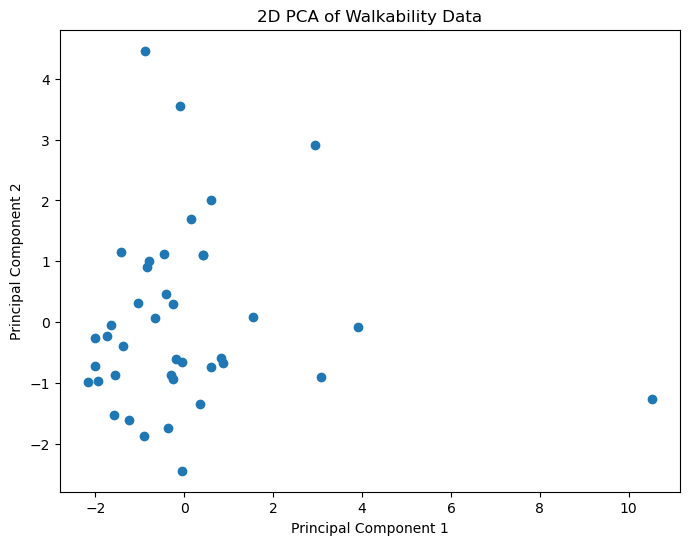

In [123]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = corr_df # Assuming 'zipcode' is not part of the features to analyze
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to two principal components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Visualize the result
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Walkability Data')
plt.show()
